# Project 4: WeRateDogs

## Wrangling and Analyzing Twitter Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering data</a></li>
<li><a href="#access">Assessing data</a></li>
<li><a href="#clean">Cleaning data</a></li>
<li><a href="#sav">Storing, Analyzing, and Visualizing</a></li>
</ul>

<a id='intro'></a>
## Introduction
The aim of this project is to wrangle,analyze and visualize the archived tweets of Twitter users @dog_rates. 

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import os
import re
import seaborn as sns
from datetime import datetime
from functools import reduce


<a id='gather'></a>
## Gather Data

### Local File (Tweet_Archived)

In [5]:
# Load your archived data and print out a few lines
twitter = pd.read_csv('twitter-archive-enhanced.csv')
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### URL (Image Predictions)

In [7]:
# Download the TSV tweet image prediction file and create a data frame to load the file

prediction = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
response = requests.get(prediction)

with open ('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#load TSV file into a dataframe
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [8]:
image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


# Twitter API

In [9]:
# Twitter API access tokens and Key
import tweepy
from tweepy import OAuthHandler
import time
import sys
import csv

# Twitter API for more data (save to local file)
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())


In [10]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
tweet_ids = list(twitter['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
869988702071779329
866816280283807744
861769973181624320
845459076796616705
842892208864923648
837012587749474308
827228250799742977
812747805718642688
802247111496568832
775096608509886464
770743923962707968


Rate limit reached. Sleeping for: 681


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 673


In [11]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [12]:
# Load the Twitter API data
twitter1= pd.read_json('tweet_json.txt')
twitter1['tweet_id'] = tweet_id_success
twitter1 = twitter1[['tweet_id', 'favorite_count', 'retweet_count']]

<a id='access'></a>
# Access Data

Two types of assessment are used:

- Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
- Programmatic assessment: pandas' functions and/or methods are used to assess the data.

Identify at least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean.Each issue is documented in one to a few sentences each.


In [13]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter.expanded_urls.value_counts()

http://www.gofundme.com/bluethewhitehusky,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1,https://twitter.com/dog_rates/status/831650051525054464/photo/1    2
https://www.gofundme.com/lolas-life-saving-surgery-funds,https://twitter.com/dog_rates/status/835264098648616962/photo/1,https://twitter.com/dog_rates/status/835264098648616962/photo/1                                                                                                                     2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                                                              2
https://twitter.com/dog_rates/status/681694085539872773/photo/1                            

In [15]:
twitter.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
twitter.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Buddy         7
Toby          7
an            7
Daisy         7
Bailey        7
Milo          6
Jax           6
Leo           6
Bella         6
Scout         6
Oscar         6
Stanley       6
Koda          6
Dave          6
Jack          6
Rusty         6
George        5
           ... 
Ebby          1
Beemo         1
Liam          1
Obi           1
Gustav        1
Shadoe        1
this          1
Petrick       1
Flurpson      1
Jockson       1
Mitch         1
Fwed          1
Jeffri        1
Cal           1
Sparky        1
Howie         1
old           1
Einstein      1
Hanz          1
Godzilla      1
Skittles      1
Ridley        1
Randall       1
Emmie         1
Tuck          1
Pubert        1
Jaspers       1
Link          1
Cannon        1
Mimosa        1
Name: name, Length: 957,

In [19]:
twitter.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [20]:
twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [21]:
twitter.puppo.value_counts()
twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [24]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
miniature_pinscher                 20
malinois                           20
Samoyed                            20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [25]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
L

In [26]:
image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg                                            2
https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                       

In [27]:
twitter1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [28]:
twitter1.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
833722901757046785    1
805487436403003392    1
759923798737051648    1
674742531037511680    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
818259473185828864    1
842765311967449089    1
809920764300447744    1
                     ..
870308999962521604    1
720775346191278080    1
879492040517615616    1
775733305207554048    1
667911425562669056    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
6788002836490690

In [29]:
twitter1.retweet_count.value_counts()

1098     5
299      4
579      4
591      4
600      4
58       4
718      4
559      4
599      4
232      4
948      4
1217     4
57       4
1135     4
505      4
128      4
154      4
84       4
139      3
652      3
380      3
378      3
682      3
490      3
8299     3
97       3
91       3
414      3
783      3
660      3
        ..
395      1
749      1
397      1
2452     1
405      1
409      1
2458     1
367      1
365      1
363      1
16721    1
4407     1
313      1
103      1
2364     1
317      1
43332    1
527      1
329      1
339      1
361      1
61785    1
347      1
6492     1
349      1
351      1
4451     1
2406     1
2408     1
0        1
Name: retweet_count, Length: 1728, dtype: int64

In [30]:
twitter1.favorite_count.value_counts()

0        167
2762       5
4033       3
1865       3
1767       3
305        3
468        3
330        3
1212       3
1567       3
164        3
8485       2
737        2
2778       2
205        2
2266       2
2758       2
705        2
679        2
2656       2
563        2
2290       2
1126       2
2588       2
525        2
2340       2
517        2
515        2
2560       2
1864       2
        ... 
4609       1
505        1
2498       1
41463      1
78275      1
2500       1
3588       1
12745      1
6602       1
4555       1
4559       1
4561       1
467        1
2516       1
4567       1
16861      1
10724      1
818        1
6632       1
2538       1
4587       1
4589       1
2542       1
2544       1
26407      1
4595       1
10740      1
501        1
2550       1
6152       1
Name: favorite_count, Length: 2010, dtype: int64

### Quality Issues identified in each table are as follows :

- Twitter DataFrame
  - As we can see 181 values in the retweet column, therefore need to remove from the data
  - Incorrect datatype as retweeted_status_timestamp and timestamp are defined as object
  - Tweet_id should be string and integer
  - Missing data in expanded_url column
  - Incorrect dog names like: a, an
  - Nulls represnted as None in doggo', 'floofer', 'pupper','puppo'
  - Remove unnecessary tags in source and we can easily identify the source
  - On assessing the twitter_enhanced.csv file you will see on row 46 that the correct rating in the tweet is 13.5 but it's extracted as 5. Hence, changing the data type as float. Extracting decimal value from text column
  - Some tweets have multiple stages present in them. These multiple stages(Dogo,Puppo) should be saved separated by comma or using the word


- Image Prediction DataFrame
  - First letter for few names in columns P1,P2 and P3 are capital
  - Combining P1,P2, P3 values into columns called as Breed and confidence
  - Less tweet id count compared tweet id count in Twitter dataframe

- Twitter1 Dataframe(Json text file)
  - Less tweet id count compared tweet id count in Twitter dataframe
  

### Tidiness Issues are as follows :

- Drop columns are not needed for analysis
- doggo, floofer, pupper and puppo columns in twitter table should be merged into one column
- join all tables together since they are talking about the same tweet




<a id='Clean'></a>

# Cleaning Data


In [31]:
# Making Copies of all dataframe
clean_twitter = twitter.copy()
clean_image_prediction = image_prediction.copy()
clean_twitter1 = twitter1.copy()

### Addressing Data Quality issues

#### Twitter Dataframe
#### Quality 1 : Remove Retweet

In [32]:
# Removing retweets as they are duplicates
#Code
clean_twitter = clean_twitter[clean_twitter.retweeted_status_id.isnull()]

#Test
clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Quality 2 :  Incorrect datatype as retweeted_status_timestamp and timestamp are defined as object. Converting them to datatype 'Datetime'

In [33]:
# Converting retweeted_status_timestamp and timestamp to Datatime
#code
clean_twitter.retweeted_status_timestamp = pd.to_datetime(clean_twitter.retweeted_status_timestamp)
clean_twitter.timestamp = pd.to_datetime(clean_twitter.timestamp)

#Test
clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns]

#### Quality 3 : Tweet_id datatype should be change to String(Object)

In [34]:
#code
clean_twitter.tweet_id = clean_twitter.tweet_id.astype(str)
clean_image_prediction.tweet_id = clean_image_prediction.tweet_id.astype(str)
clean_twitter1.tweet_id = clean_twitter1.tweet_id.astype(str)
# Test
clean_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns

#### Quality 4 : Missing data in expanded_url column

In [35]:
# null expanded url can be generated using tweet_id column
#code
def add_urls(url):
    if pd.notnull(url['expanded_urls']):
        return url
    else:
        # use tweet_id to get the urls
        tweet_id =url['tweet_id']
        url['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return url
    
    
# Adding missing url to dataframe
clean_twitter = clean_twitter.apply(add_urls,axis =1)

#test
clean_twitter.expanded_urls.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: expanded_urls, Length: 2175, dtype: bool

#### Quality 5 : Incorrect dog names. Need to replace all the lowercase names and None with 'Nan' as they are not actual dog names.


In [36]:
# Replacing names with Nan
#code
clean_twitter['name'][clean_twitter['name'].str.match('[a-z]')] = 'None'
clean_twitter.name = clean_twitter.name.replace('None',np.nan)

#Test
clean_twitter.name.value_counts()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Lucy        11
Charlie     11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Lola         8
Sadie        8
Winston      8
Daisy        7
Toby         7
Bo           6
Oscar        6
Bella        6
Bailey       6
Stanley      6
Jax          6
Koda         6
Buddy        5
Louis        5
Milo         5
Chester      5
Leo          5
Dave         5
Rusty        5
Bentley      5
Scout        5
Gary         4
Alfie        4
Clark        4
            ..
Bubba        1
Ebby         1
Bungalo      1
Beemo        1
Petrick      1
Cannon       1
Rodman       1
Cali         1
Angel        1
Dewey        1
Philippe     1
Jockson      1
Mitch        1
Fwed         1
Jeffri       1
Cal          1
Sparky       1
Howie        1
Einstein     1
Flurpson     1
Simba        1
Skittles     1
Ridley       1
Randall      1
Emmie        1
Tuck         1
Pubert       1
Jaspers      1
Link         1
Hurley       1
Name: name, Length: 930, dtype: int64

#### Quality 6: Nulls represnted as None in doggo', 'floofer', 'pupper','puppo'

In [37]:
#code
clean_twitter.doggo=clean_twitter.doggo.replace('None','')
clean_twitter.floofer=clean_twitter.floofer.replace('None','')
clean_twitter.pupper=clean_twitter.pupper.replace('None','')
clean_twitter.puppo=clean_twitter.puppo.replace('None','')

#test
clean_twitter.doggo.value_counts()

         2088
doggo      87
Name: doggo, dtype: int64

#### Quality 7: Unnecessary html tags in source column. By removing them columns lookinf neat and we can easily identify the source

In [38]:
#code
clean_twitter.source = clean_twitter.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
#test
clean_twitter.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
29      Twitter for iPhone
30      Twitter for iPhone
               ...        
2326    Twitter for iPhone
2327    Twitter for iPhone
2328    Twitter for iPhone
2329    Twitter for iPhone
2330    Twitter for iPhone
2331    Twitter for iPhone
2

#### Quality 8 : 
- On assessing the twitter_enhanced.csv file you will see on row 46 that the correct rating in the tweet is 13.5 but it's extracted as 5. Hence, changing the data type as float.
- Extracting decimal value from text column

In [39]:
#Converting the datatype as float
clean_twitter.rating_numerator  = clean_twitter.rating_numerator .astype(float)

#test
clean_twitter.info()


# Extracting decimal value from text column
clean_twitter[clean_twitter.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

#Test

clean_twitter.rating_numerator.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


12.0      500
10.0      442
11.0      426
13.0      307
9.0       156
8.0        98
7.0        54
14.0       43
5.0        36
6.0        32
3.0        19
4.0        17
2.0         9
1.0         8
0.0         2
420.0       2
84.0        1
24.0        1
27.0        1
15.0        1
17.0        1
960.0       1
143.0       1
99.0        1
666.0       1
121.0       1
182.0       1
165.0       1
45.0        1
75.0        1
204.0       1
1776.0      1
80.0        1
88.0        1
144.0       1
26.0        1
20.0        1
44.0        1
60.0        1
50.0        1
Name: rating_numerator, dtype: int64

#### Quality 9 :Some tweets have multiple stages present in them. These multiple stages(Dogo,Puppo) should be saved separated by comma or using the word

In [41]:
print(len(clean_twitter[(clean_twitter.doggo != '') & (clean_twitter.floofer != '')]))
print(len(clean_twitter[(clean_twitter.doggo != '') & (clean_twitter.puppo != '')]))
print(len(clean_twitter[(clean_twitter.doggo != '') & (clean_twitter.pupper != '')]))


1
1
10


In [42]:
# Lets see the text column to understand what value column should represent

for i, row in clean_twitter[((clean_twitter.doggo != '') & (clean_twitter.floofer != ''))
                   | ((clean_twitter.doggo != '') & (clean_twitter.puppo != ''))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk



In [43]:
# Removing doggo based on the text above 

clean_twitter['doggo'][clean_twitter.tweet_id.isin([855851453814013952, 854010172552949760])] = ''

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
# Now lets address doggo and puppo appearing together
for i, row in clean_twitter[((clean_twitter.doggo != '') & (clean_twitter.pupper != ''))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))
    
# Looking at this there is no clear indication which one to keep. 
#ll use both of them while merging these column into single stage column

817777686764523521 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7

808106460588765185 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho

802265048156610565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze

801115127852503040 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj

785639753186217984 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd

781308096455073793 Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u

759793422261743616 Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the s

#### Image_Prediction DataFrame

#### Quality 10 : First letter for few names in columns P1,P2 and P3 are capital. Standardize the columns by converting them to lower case.

In [47]:
#code
clean_image_prediction['p1'] = clean_image_prediction['p1'].str.lower()
clean_image_prediction['p2'] = clean_image_prediction['p2'].str.lower()
clean_image_prediction['p2'] = clean_image_prediction['p2'].str.lower()

#Test
clean_image_prediction['p1']

0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
19                italian_greyhound
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        ch

#### Quality 11: Combining P1,P2, P3 values into columns called as Breed and confidence

In [48]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

clean_image_prediction.apply(breed_conf, axis = 1)

clean_image_prediction['breed'] = breed
clean_image_prediction['confidence'] = conf


#Test
clean_image_prediction['breed']


0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                    Unidentifiable
7                              chow
8                  golden_retriever
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                   Unidentifiable
18                   Unidentifiable
19                italian_greyhound
20                      maltese_dog
21                   Unidentifiable
22                     newfoundland
23                 golden_retriever
24                         malamute
25                   Unidentifiable
26      soft-coated_wheaten_terrier
27                        ch

#### Tidiness

#### 1: Merge all dataset Together

Since all the information is about the same tweet; need to merge all the dataset together

In [49]:
#code
dfs = [clean_twitter, clean_twitter1, clean_image_prediction]
twitter_archive_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)
#test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 32 columns):
tweet_id                      1992 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null float64
rating_denominator            1992 non-null int64
name                          1348 non-null object
doggo                         1992 non-null object
floofer                       1992 non-null object
pupper                        1992 non-null object
puppo                         1992 non-null object
favorite_count     

#### 2: Doggo, floofer, pupper and puppo columns in twitter table should be merged into one column "Stage" and also convert the datatype from string to category for analysis purpose

In [64]:
#code
#Merge them into single colum also addressing multiple values 

def get_stage(row):
    # Keep all dog stages ()
    stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
        
    if len(stage) < 1: # Default to 'None' if list is empty
        row['stage'] = ''
    else: 
        # Update the row and give back the final row
        row['stage'] = ','.join(stage)

        #Return updated column
    return row

# Apply to each row
twitter_archive_master = twitter_archive_master.apply(get_stage, axis=1)

#Converting Datatype
twitter_archive_master.stage = twitter_archive_master.stage.astype('category')

# test
twitter_archive_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 33 columns):
tweet_id                      1992 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1992 non-null datetime64[ns]
source                        1992 non-null object
text                          1992 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1992 non-null object
rating_numerator              1992 non-null float64
rating_denominator            1992 non-null int64
name                          1348 non-null object
doggo                         1992 non-null object
floofer                       1992 non-null object
pupper                        1992 non-null object
puppo                         1992 non-null object
favorite_count     

#### 3: Remove unwanted columns from the Twitter dataset which will make it look more clean.

In [65]:
#remove unwanted columns from Twitter Column
twitter_archive_master.drop(['retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo',
               'text',
                'p1', 
               'p1_conf', 
                'p1_dog', 
                'p2',
                'p2_conf',
                'p2_dog', 
                'p3', 
                'p3_conf', 
                'p3_dog'],axis=1,inplace=True)
#test
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 12 columns):
tweet_id              1992 non-null object
timestamp             1992 non-null datetime64[ns]
rating_numerator      1992 non-null float64
rating_denominator    1992 non-null int64
name                  1348 non-null object
favorite_count        1992 non-null int64
retweet_count         1992 non-null int64
jpg_url               1992 non-null object
img_num               1992 non-null int64
breed                 1992 non-null object
confidence            1992 non-null float64
stage                 1992 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 189.1+ KB


<a id='sav'></a>
# Storing, Analyzing, and Visualizing

In [66]:
# Storing the dataframe as csv
twitter_archive_master .to_csv('twitter_archive_master.csv',index=False)

# Analyzing and Visualizing Data

Text(0, 0.5, 'Count of Tweets')

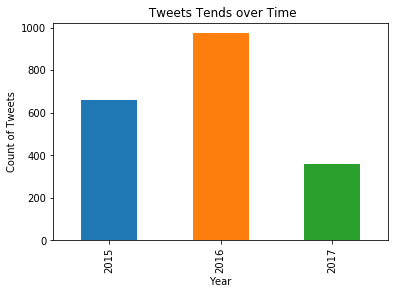

In [67]:
#Visualization 1:
#Tweet Trends over Time(Year)

tweet_year = twitter_archive_master.tweet_id.groupby(twitter_archive_master['timestamp'].dt.year).count()
df = tweet_year.plot('bar',title =' Tweets Tends over Time')
df.set_xlabel("Year")
df.set_ylabel("Count of Tweets")


Text(0, 0.5, 'Count of Tweets')

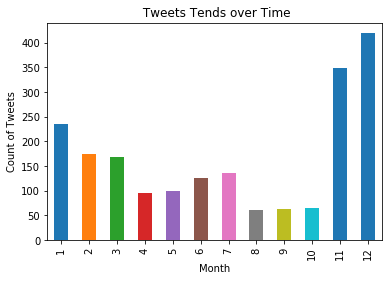

In [68]:
#Visualization 1:
#Tweet Trends over Time(Month)

tweet_month = twitter_archive_master.tweet_id.groupby(twitter_archive_master['timestamp'].dt.month).count()
df1 = tweet_month.plot('bar',title =' Tweets Tends over Time')
df1.set_xlabel("Month")
df1.set_ylabel("Count of Tweets")

#### As we can observe, in year 2016 the number of tweets were greater compared to other years. Also, usually number of tweets are higher in the month Nov and Dec.

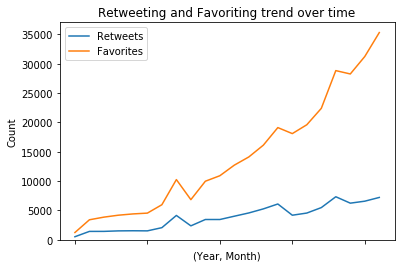

In [69]:
# Visualization 2: Trend of Retweet and Favorites
twitter_archive_master.retweet_count.groupby([twitter_archive_master["timestamp"].dt.year, twitter_archive_master["timestamp"].dt.month]).mean().plot('line')
twitter_archive_master.favorite_count.groupby([twitter_archive_master["timestamp"].dt.year, twitter_archive_master["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

Text(0.5, 1.0, 'Favorite vs Retweet Scatter plot')

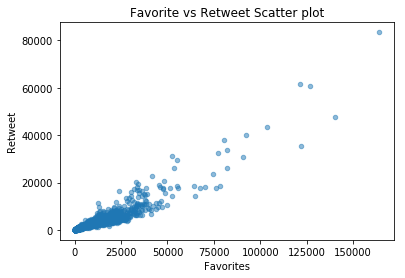

In [70]:
#Visulization 2:

#Correlation between retweet and favourite_count
twitter_archive_master.plot(kind='scatter',x= 'favorite_count',y = 'retweet_count',alpha =0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweet')
plt.title('Favorite vs Retweet Scatter plot')

#### Scatter plots people are retweeting is highly correlated with favorites

Text(0.5, 1.0, 'Top 8 Dog Names')

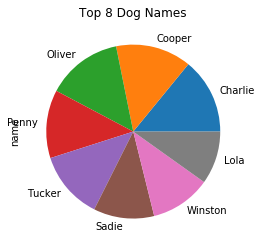

In [71]:
# Visualization 3:
# Most common dog name:

twitter_archive_master.name.value_counts()[1:9].plot('pie')
plt.title('Top 8 Dog Names')

Text(0.5, 1.0, 'Top 10 Common Dog Names')

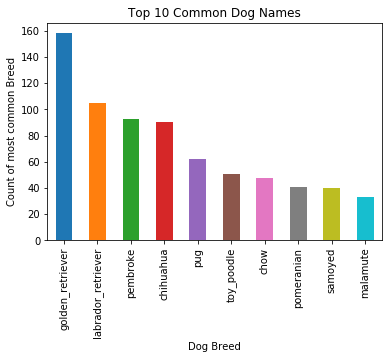

In [72]:
# Visualization 4:
# Most common dog Breed:

twitter_archive_master.breed.value_counts()[1:11].plot('bar')
plt.xlabel('Dog Breed')
plt.ylabel('Count of most common Breed')
plt.title('Top 10 Common Dog Names')

#### There could be multiple reasons as why these breeds are famous
- People or machine can easily recognize them
- Most commonly owned


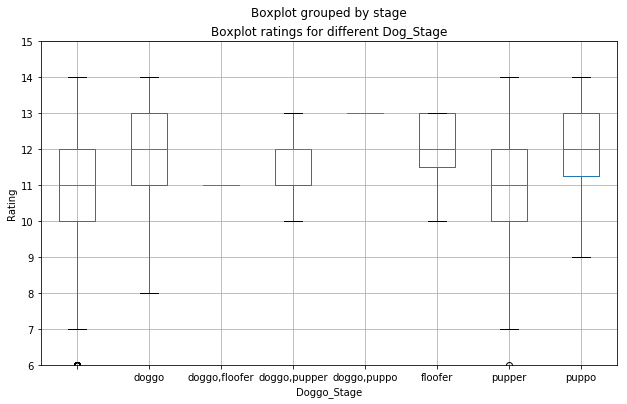

In [73]:
#Visualization 5 : 
# Plot the Dog_Stage with ratings
plt.rcParams['figure.figsize']=(10,6)
twitter_archive_master[pd.notnull(twitter_archive_master['stage'])].boxplot(column = ['rating_numerator'], by = ['stage'])
plt.ylim((6,15))
plt.title('Boxplot ratings for different Dog_Stage')
plt.xlabel('Doggo_Stage')
plt.ylabel('Rating');

#### Puppo dogs are consistently rated higher than others